## Задача - подобрать модель для задачи бинарной классификации: отделить "хороших " заёмщиков от"плохих"

## Импорт библиотек

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss, zero_one_loss
from IPython.display import display
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier

# Дропаю дубликаты из датасета

In [5]:
df = df.drop_duplicates()
df

,C1,N2,N3,C4_enc,C5_enc,C6_enc,N7,C8,C9,N10,C11,C12_enc,N13,N14,Target
0,1.0,28.00,2.000,2.0,4.0,8.0,4.165,1.0,1.0,2.0,1.0,2.0,181.0,1.0,1.0
1,1.0,36.25,5.000,2.0,8.0,5.0,2.500,1.0,1.0,6.0,0.0,2.0,0.0,368.0,1.0
2,0.0,29.50,2.000,1.0,10.0,8.0,2.000,0.0,0.0,0.0,0.0,2.0,256.0,18.0,0.0
3,1.0,22.67,0.165,2.0,8.0,3.0,2.250,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
4,0.0,25.75,0.500,2.0,8.0,8.0,0.875,1.0,0.0,0.0,1.0,2.0,491.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,1.0,28.75,1.165,2.0,4.0,4.0,0.500,1.0,0.0,0.0,0.0,1.0,280.0,1.0,0.0
582,1.0,44.83,7.000,1.0,8.0,4.0,1.625,0.0,0.0,0.0,0.0,2.0,160.0,3.0,0.0
583,1.0,21.33,7.500,2.0,6.0,4.0,1.415,1.0,1.0,1.0,0.0,2.0,80.0,9801.0,1.0
584,0.0,53.33,0.165,2.0,1.0,1.0,0.000,0.0,0.0,0.0,1.0,1.0,62.0,28.0,0.0


# Проверяю датафрейм на наличие Null и смотрю тип данных в столбце

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 585
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   C1       586 non-null    float64
 1   N2       586 non-null    float64
 2   N3       586 non-null    float64
 3   C4_enc   586 non-null    float64
 4   C5_enc   586 non-null    float64
 5   C6_enc   586 non-null    float64
 6   N7       586 non-null    float64
 7   C8       586 non-null    float64
 8   C9       586 non-null    float64
 9   N10      586 non-null    float64
 10  C11      586 non-null    float64
 11  C12_enc  586 non-null    float64
 12  N13      586 non-null    float64
 13  N14      586 non-null    float64
 14  Target   586 non-null    float64
dtypes: float64(15)
memory usage: 73.2 KB


In [7]:
df.describe()

,C1,N2,N3,C4_enc,C5_enc,C6_enc,N7,C8,C9,N10,C11,C12_enc,N13,N14,Target
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,0.679181,31.718737,4.818660,1.771331,7.354949,4.742321,2.342773,0.530717,0.436860,2.498294,0.462457,1.928328,182.001706,972.648464,0.445392
std,0.467190,11.903846,4.973202,0.428391,3.675786,2.006864,3.505711,0.499482,0.496421,4.994441,0.499015,0.306594,174.576425,5156.884823,0.497434
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.830000,1.085000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.000000,0.000000,2.000000,73.500000,1.000000,0.000000
50%,1.000000,28.920000,3.000000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,160.000000,5.000000,0.000000
75%,1.000000,38.065000,7.070000,2.000000,10.000000,5.000000,3.000000,1.000000,1.000000,3.000000,1.000000,2.000000,266.750000,434.000000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.000000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [68]:
df.Target.value_counts(normalize = True)

0.0    0.554608
1.0    0.445392
Name: Target, dtype: float64

# Классы распределены практически равномерно, это очень хорошо

# Делю данные на трейн и тест

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Target']), df.Target, test_size=0.3)

# Функция для отрисовки гистограмм

In [66]:
def histmaker_for_numeric_df(df, bins=20, figsize=(15, 5), palette='deep'):
    numeric_df = df.select_dtypes(include=np.number)

    sns.set(style='darkgrid', palette=palette)

    num_plots = len(numeric_df.columns)  # количество графиков
    num_rows = (num_plots - 1) // 3 + 1  # количество строк 
    num_cols = min(num_plots, 3)         # количество столбцов

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(figsize[0], figsize[1] * num_rows))
    plt.suptitle('Гистограммы каждой фичи', fontsize=15)

    axes = axes.flatten()
    for i, ax in enumerate(axes):
        if i < num_plots:
            ax.hist(numeric_df.iloc[:, i], bins=bins, edgecolor='black', alpha=0.7)
            ax.set_title(numeric_df.columns[i], weight='bold')
            if i % 3 == 0:
                ax.set_ylabel('Count')
    for ax in axes[num_plots:]:
        ax.remove()

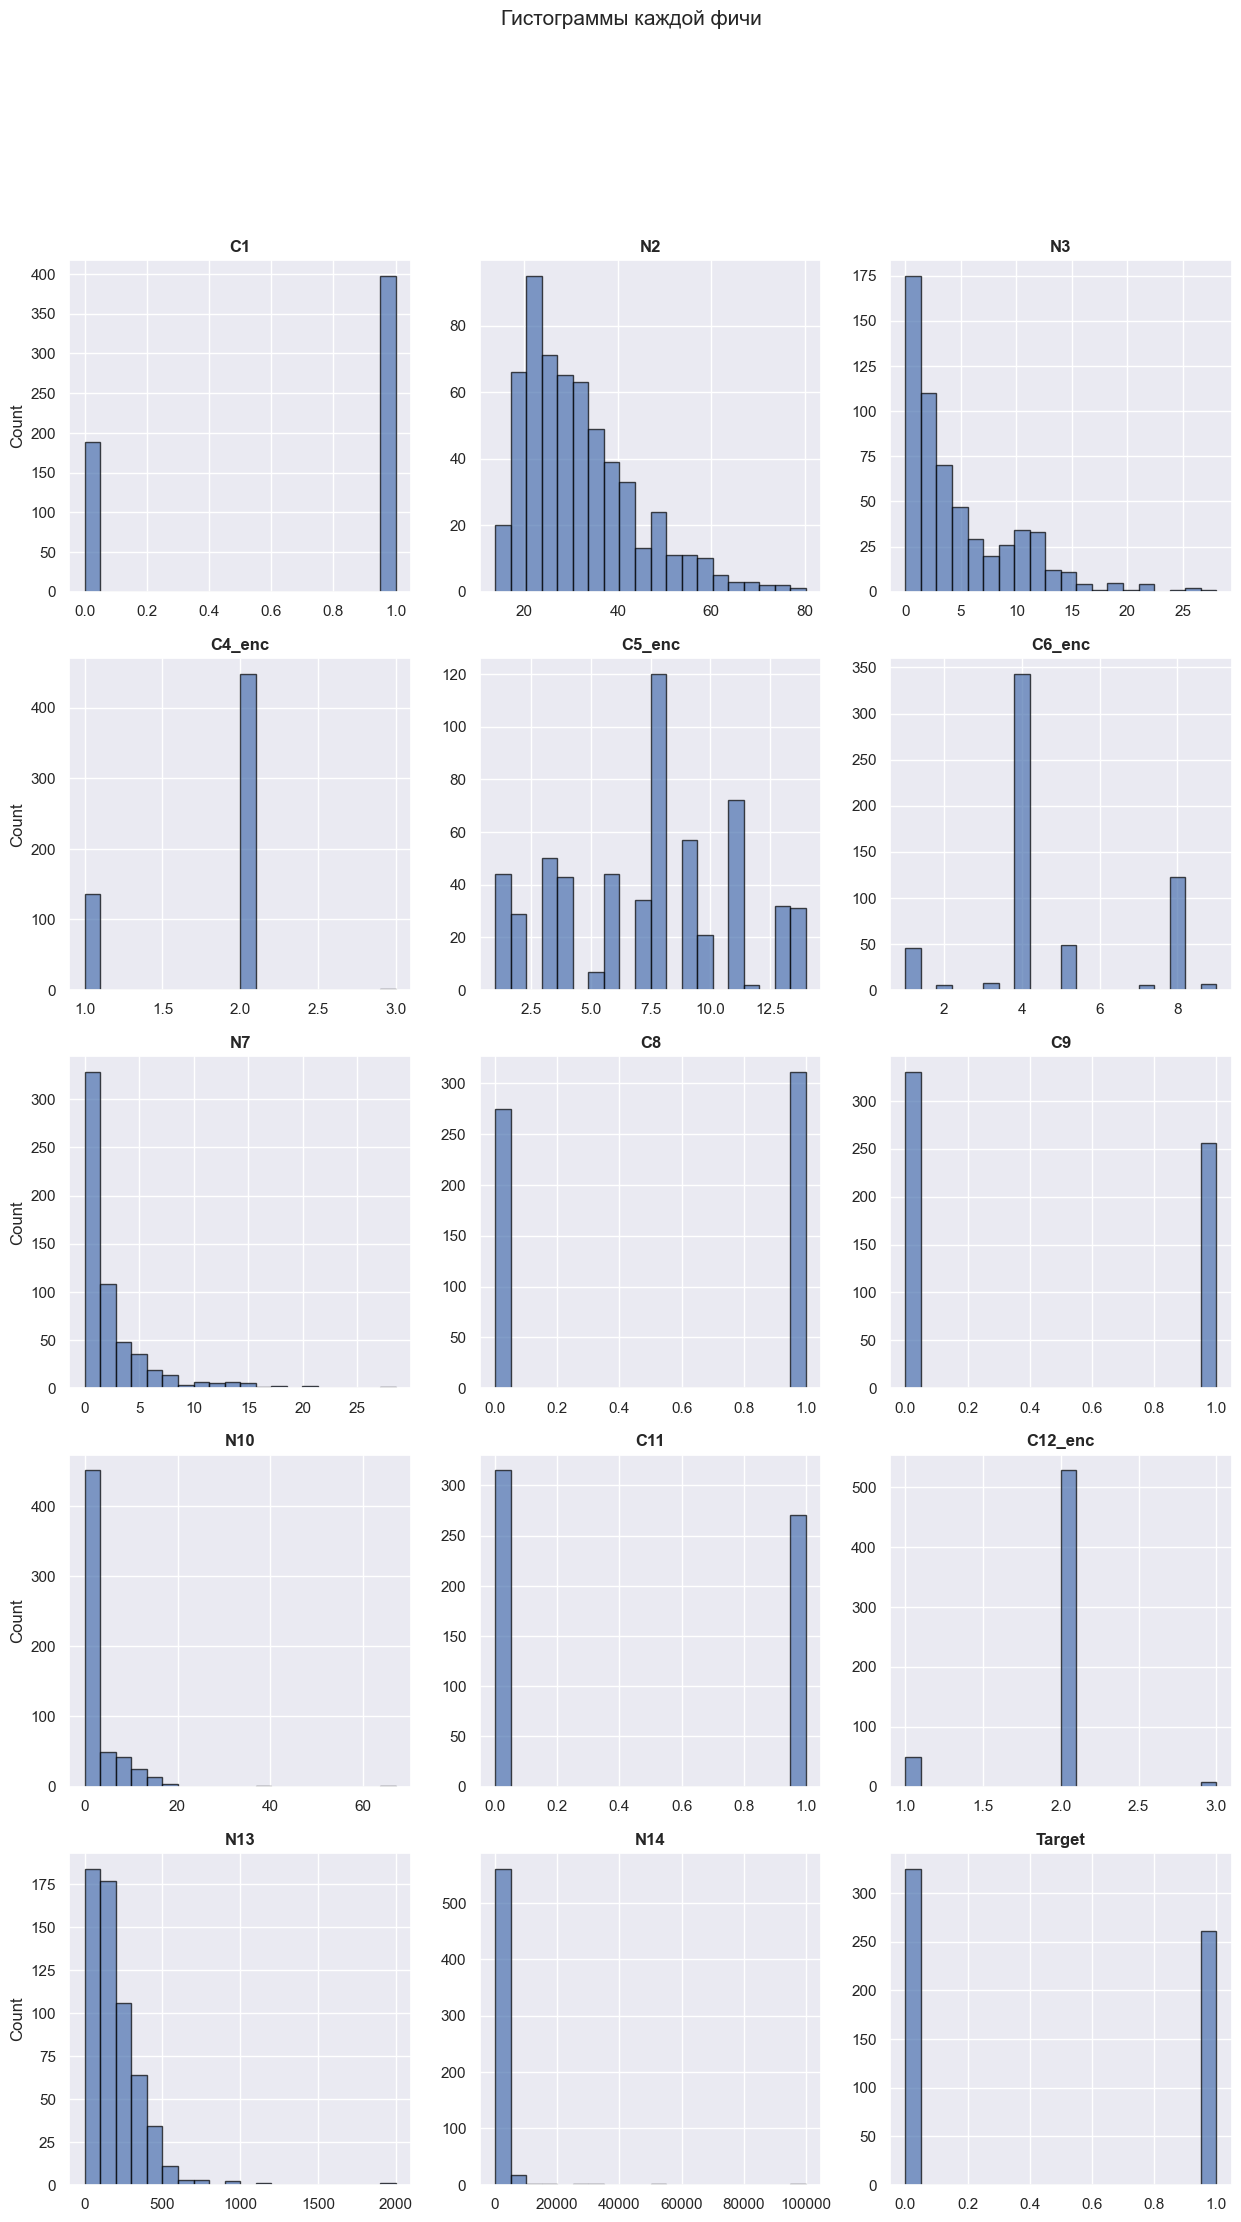

In [67]:
histmaker_for_numeric_df(df)

# На гистограммах видно, что N10 N13 N14 имеют длинные хвосты, но трогать данные я не буду, во-первых, потому что в прошлом ДЗ я из-за этого получил худший скор, во-вторых: деревья и бустинг устойчивы к выбросам, соединив их стекингом и сделав мета-моделью логистическую регрессию мне лишь останется применить скаллер, чтобы "сгруппировать" данные

# Матрица корреляции - видно, что c1 - главный компонент, во многом, именно по этому параметру будет выноситься решение

Text(0.5, 1.0, 'Correlation Matrix')

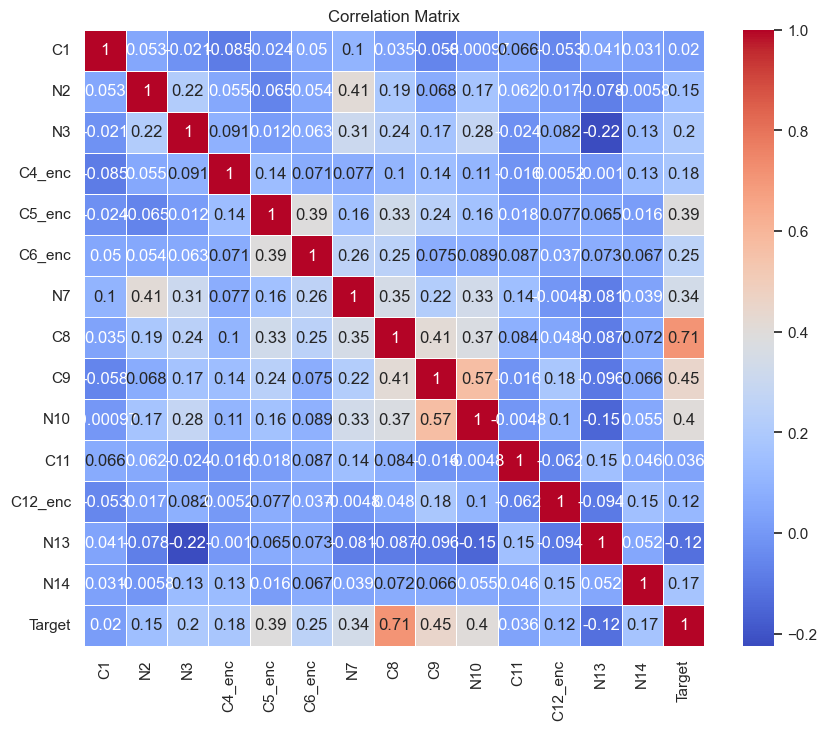

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')

# Я хочу использовать стекинг, обучу несколько моделей, начну с градиентного бустинга

## Передам в решетку относительно немного параметров, поскольку в предыдущих прогонах я нашёл окрестность оптимальных параметров, чтобы не перегружать итоговый код буду прогонять небольшие решётки

In [12]:
param_grid = {
    'classifier__n_estimators': [90, 95, 100],
    'classifier__learning_rate': [0.1, 0.11, 0.12, 0.13],
    'classifier__min_samples_split': [3, 4, 5],
    'classifier__min_samples_leaf': [1, 2, 3],
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__subsample': [0.8, 0.9]
}

# Пропорции классов целевой переменной сохраняются в каждом фолде также, как и в исходном фрейме

In [13]:
cv = StratifiedKFold(n_splits=10)

In [14]:
pipe = Pipeline([
    ('classifier', GradientBoostingClassifier(criterion='friedman_mse' , random_state = 42))
])

# Буду максимизировать гиперпараметры по f1-мере, поскольку F1 Score учитывает как точность, так и полноту, предоставляя меру, которая учитывает как ложноположительные (ошибки в отказах для хороших заемщиков), так и ложноотрицательные (ошибки в выдаче кредитов плохим заемщикам) прогнозы, что и является условием задачи

In [15]:
grid_2 = GridSearchCV(pipe, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1) 
grid_2.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.1, 0.11, 0.12, 0.13],
                         'classifier__max_features': [None, 'sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 3],
                         'classifier__min_samples_split': [3, 4, 5],
                         'classifier__n_estimators': [90, 95, 100],
                         'classifier__subsample': [0.8, 0.9]},
             scoring='f1')

In [16]:
grid_2.best_params_, grid_2.best_score_, grid_2.score(X_test, y_test)

({'classifier__learning_rate': 0.11,
  'classifier__max_features': None,
  'classifier__min_samples_leaf': 1,
  'classifier__min_samples_split': 4,
  'classifier__n_estimators': 100,
  'classifier__subsample': 0.9},
 0.8520791609026903,
 0.8837209302325582)

In [17]:
grad = grid_2.best_estimator_

In [18]:
grid_result = pd.DataFrame(grid_2.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,173,359,357,169,92,98,104,146,152,158,...,396,402,450,456,508,514,400,406,454,460
mean_fit_time,0.31486,0.31282,0.30658,0.283855,0.229776,0.244073,0.229447,0.239033,0.234892,0.226656,...,0.236571,0.215533,0.217798,0.219282,0.307932,0.304646,0.238956,0.239189,0.242044,0.24145
std_fit_time,0.010524,0.007542,0.013706,0.01022,0.006694,0.010993,0.00788,0.011792,0.005931,0.005474,...,0.031628,0.005654,0.004736,0.008707,0.008457,0.004752,0.004516,0.005363,0.006868,0.005126
mean_score_time,0.006183,0.005916,0.006267,0.00675,0.007279,0.006665,0.006673,0.006801,0.00692,0.006534,...,0.006848,0.006642,0.00656,0.006936,0.006411,0.005801,0.006365,0.006937,0.007635,0.0066
std_score_time,0.000676,0.000899,0.000663,0.001365,0.001141,0.000729,0.001261,0.00125,0.000982,0.000511,...,0.00255,0.000918,0.00097,0.001162,0.000673,0.000399,0.000456,0.000881,0.002704,0.000917
param_classifier__learning_rate,0.11,0.12,0.12,0.11,0.1,0.1,0.1,0.1,0.1,0.1,...,0.12,0.12,0.12,0.12,0.13,0.13,0.12,0.12,0.12,0.12
param_classifier__max_features,None,None,None,None,sqrt,sqrt,sqrt,log2,log2,log2,...,sqrt,sqrt,log2,log2,None,None,sqrt,sqrt,log2,log2
param_classifier__min_samples_leaf,1,2,2,1,3,3,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
param_classifier__min_samples_split,4,5,5,4,3,4,5,3,4,5,...,3,4,3,4,3,4,3,4,3,4
param_classifier__n_estimators,100,100,95,90,95,95,95,95,95,95,...,90,90,90,90,100,100,100,100,100,100
param_classifier__subsample,0.9,0.9,0.9,0.9,0.8,0.8,0.8,0.8,0.8,0.8,...,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


In [19]:
y_pred = grad.predict(X_test)

# Матрица ошибок для градиентного бустинга

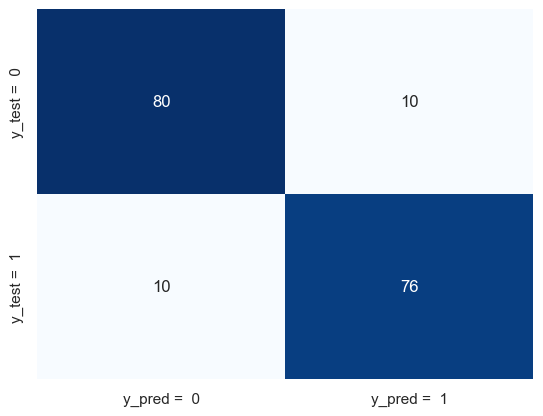

In [20]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='g', cbar=None, cmap="Blues", 
            xticklabels=['y_pred =  0', 'y_pred =  1'], yticklabels=['y_test =  0', 'y_test =  1']);

# Довольно неплохая матрица, посчитаю f1

In [21]:
f1 = f1_score(y_test, y_pred)
print(f'f1: {f1}')

f1: 0.8837209302325582


# f1 хорошая, посмотрю скоры на тесте и трейне

In [22]:
print('Правильность на обучающем наборе: {:.3f}'.format(grad.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(grad.score(X_test, y_test)))

Правильность на обучающем наборе: 0.995
Правильность на тестовом наборе: 0.886


# Разброс в скорах на тесте и трейне составляет 10%, но при этом модель не переобучилась, на плато она не вышла, все графики я отрисовывал в другом notebook, чтобы не засорять код

# Обучаю случайный лес, опять же, передаю параметры, которые по итогам моих больших решеток, лежат в окрестности оптимума

In [23]:
param_grid = {
    'classifier__n_estimators': [1000],
    'classifier__max_depth': [3,4],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features' : ['sqrt', 'log2', None],
    'classifier__criterion': ['gini', 'entropy', 'log_loss']
}

In [24]:
rf = Pipeline([('classifier', RandomForestClassifier(random_state=42))])

In [25]:
grid_rf = GridSearchCV(estimator=rf, n_jobs=-1, param_grid=param_grid, cv=cv, scoring='f1')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'classifier__max_depth': [3, 4],
                         'classifier__max_features': ['sqrt', 'log2', None],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [1000]},
             scoring='f1')

In [26]:
grid_result_rf = pd.DataFrame(grid_rf.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_rf

,48,49,45,46,47,50,51,52,53,24,...,16,17,55,58,64,67,109,112,118,121
mean_fit_time,4.571339,4.50096,4.640922,4.687454,4.64356,4.582283,4.714196,4.418834,4.733209,4.39737,...,3.753538,3.659379,3.722189,3.717476,3.733094,4.039082,3.757829,3.825863,3.718667,3.716692
std_fit_time,0.062383,0.066125,0.023667,0.071536,0.068297,0.158913,0.149739,0.041636,0.116001,0.039118,...,0.028734,0.057801,0.034535,0.034525,0.050106,0.128664,0.025166,0.062376,0.029194,0.046554
mean_score_time,0.208221,0.205758,0.210187,0.210109,0.210817,0.210502,0.207787,0.199799,0.220802,0.223175,...,0.222137,0.208734,0.212917,0.208003,0.213976,0.212192,0.211534,0.21543,0.211481,0.209809
std_score_time,0.008649,0.00873,0.004514,0.007431,0.006628,0.01671,0.008488,0.006434,0.022261,0.018757,...,0.014006,0.006488,0.007294,0.006639,0.006593,0.007787,0.010351,0.012055,0.011492,0.00694
param_classifier__criterion,gini,gini,gini,gini,gini,gini,gini,gini,gini,gini,...,gini,gini,entropy,entropy,entropy,entropy,log_loss,log_loss,log_loss,log_loss
param_classifier__max_depth,4,4,4,4,4,4,4,4,4,3,...,3,3,3,3,3,3,3,3,3,3
param_classifier__max_features,None,None,None,None,None,None,None,None,None,None,...,log2,log2,sqrt,sqrt,log2,log2,sqrt,sqrt,log2,log2
param_classifier__min_samples_leaf,2,2,1,1,1,2,4,4,4,4,...,4,4,1,2,1,2,1,2,1,2
param_classifier__min_samples_split,2,5,2,5,10,10,2,5,10,2,...,5,10,5,5,5,5,5,5,5,5
param_classifier__n_estimators,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


In [27]:
rf_final =  grid_rf.best_estimator_

In [28]:
y_pred = rf_final.predict(X_test)

In [29]:
f1 = f1_score(y_test, y_pred)
print(f'f1: {f1}')

f1: 0.8837209302325582


# f1 несильно отличается, это радует, поскольку результат уже хороший

# Смотрю скоры, разброс уменьшается

In [30]:
print('Правильность на обучающем наборе: {:.3f}'.format(rf_final.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(rf_final.score(X_test, y_test)))

Правильность на обучающем наборе: 0.922
Правильность на тестовом наборе: 0.886


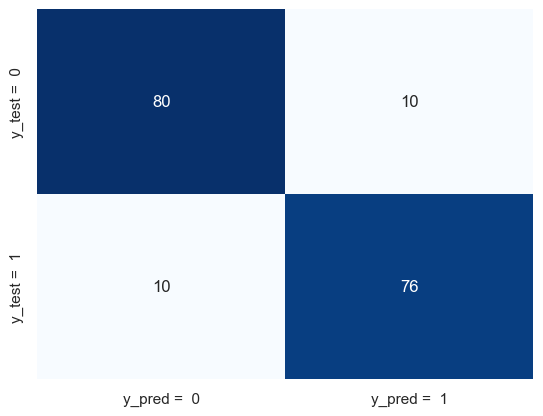

In [31]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='g', cbar=None, cmap="Blues", 
            xticklabels=['y_pred =  0', 'y_pred =  1'], yticklabels=['y_test =  0', 'y_test =  1']);

# Ищу параметры для AdaBoosting

In [32]:
param_grid = {
    'n_estimators': [50, 100, 200, 300], 
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  
    'base_estimator__max_depth': [1, 2, 3 , None]
}

In [33]:
base_estimator = DecisionTreeClassifier(random_state = 42)
ada_boost = AdaBoostClassifier(base_estimator=base_estimator)

In [34]:
grid_ada = GridSearchCV(ada_boost, param_grid, cv=cv, scoring='f1', n_jobs=-1)
grid_ada.fit(X_train, y_train)

C:\Users\serdyukov\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42)),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [1, 2, 3, None],
                         'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='f1')

In [35]:
grid_result_ada = pd.DataFrame(grid_ada.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_ada

,6,3,19,43,32,17,0,1,16,5,...,50,15,11,47,44,30,29,54,48,28
mean_fit_time,0.923476,1.074256,1.462211,1.618552,0.265643,0.522193,0.173999,0.333161,0.267058,0.362855,...,0.013027,1.364441,1.388806,1.728303,0.286084,1.061431,0.530016,0.011877,0.013031,0.239678
std_fit_time,0.093762,0.058341,0.051578,0.041617,0.010446,0.033396,0.007066,0.006091,0.023977,0.013323,...,0.002037,0.036289,0.127426,0.066689,0.034373,0.053498,0.075042,0.001182,0.002043,0.004573
mean_score_time,0.081231,0.07884,0.106482,0.10614,0.024061,0.040403,0.018839,0.028073,0.024834,0.0341,...,0.006348,0.10622,0.126079,0.099265,0.023669,0.071062,0.049243,0.006521,0.006,0.021167
std_score_time,0.011641,0.007854,0.012482,0.009734,0.004735,0.005845,0.004173,0.001941,0.00209,0.004689,...,0.001672,0.00621,0.020375,0.019203,0.007404,0.004664,0.009893,0.001025,0.00092,0.001417
param_base_estimator__max_depth,1,1,2,3,3,2,1,1,2,1,...,None,1,1,3,3,2,2,None,None,2
param_learning_rate,0.1,0.01,0.01,0.5,0.01,0.01,0.01,0.01,0.01,0.1,...,0.01,1.0,0.5,1.0,1.0,1.0,1.0,0.1,0.01,1.0
param_n_estimators,200,300,300,300,50,100,50,100,50,100,...,200,300,300,300,50,200,100,200,50,50
params,"{'base_estimator__max_depth': 1, 'learning_rat...","{'base_estimator__max_depth': 1, 'learning_rat...","{'base_estimator__max_depth': 2, 'learning_rat...","{'base_estimator__max_depth': 3, 'learning_rat...","{'base_estimator__max_depth': 3, 'learning_rat...","{'base_estimator__max_depth': 2, 'learning_rat...","{'base_estimator__max_depth': 1, 'learning_rat...","{'base_estimator__max_depth': 1, 'learning_rat...","{'base_estimator__max_depth': 2, 'learning_rat...","{'base_estimator__max_depth': 1, 'learning_rat...",...,"{'base_estimator__max_depth': None, 'learning_...","{'base_estimator__max_depth': 1, 'learning_rat...","{'base_estimator__max_depth': 1, 'learning_rat...","{'base_estimator__max_depth': 3, 'learning_rat...","{'base_estimator__max_depth': 3, 'learning_rat...","{'base_estimator__max_depth': 2, 'learning_rat...","{'base_estimator__max_depth': 2, 'learning_rat...","{'base_estimator__max_depth': None, 'learning_...","{'base_estimator__max_depth': None, 'learning_...","{'base_estimator__max_depth': 2, 'learning_rat..."
split0_test_score,0.709677,0.742857,0.709677,0.787879,0.722222,0.764706,0.790698,0.790698,0.790698,0.75,...,0.777778,0.789474,0.6875,0.787879,0.764706,0.6875,0.6875,0.789474,0.789474,0.666667
split1_test_score,0.888889,0.871795,0.842105,0.888889,0.820513,0.85,0.85,0.85,0.85,0.888889,...,0.764706,0.857143,0.833333,0.857143,0.8,0.823529,0.75,0.764706,0.764706,0.833333


In [36]:
ada_final = grid_ada.best_estimator_

In [37]:
y_pred = ada_final.predict(X_test)

In [38]:
f1 = f1_score(y_test, y_pred)
print(f'f1: {f1}')

f1: 0.8735632183908046


In [39]:
print('Правильность на обучающем наборе: {:.3f}'.format(ada_final.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(ada_final.score(X_test, y_test)))

Правильность на обучающем наборе: 0.920
Правильность на тестовом наборе: 0.875


# Хорошие результаты для f1 и скоров

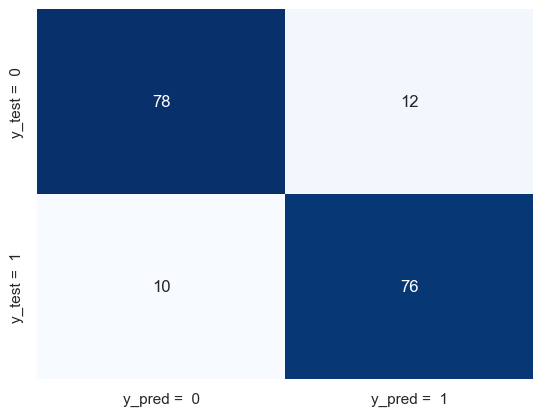

In [40]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='g', cbar=None, cmap="Blues", 
            xticklabels=['y_pred =  0', 'y_pred =  1'], yticklabels=['y_test =  0', 'y_test =  1']);

# Теперь обучу метамодель - Логистическую регрессию. Почему? Во-первых, на курсах по риск-аналитике от одной консалтинговой компании слышал о том, что в банковской сфере очень любят модель логистической регрессии для задач классификации (как раз речь шла о выдаче кредитов и фрод). Во-вторых, она показывает очень хорошие результаты

In [41]:
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler(), Normalizer()]

# Как и говорил, использую скалеры, чтобы данные "уплотнились", по идее, лучше всего использовать только Robust, поскольку он лучше всего борется с выбросами, но отдельные прогоны только с робастом показывают результат хуже

In [42]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state = 42))
])

param_grid = {
    'scaler': scalers,
    'lr__C': [0.01, 0.1, 1, 10, 100], 
    'lr__penalty': ['l1', 'l2'], 
    'lr__solver': ['liblinear', 'saga']  
}

In [43]:
grid_lr = GridSearchCV(pipeline, param_grid, scoring='f1', cv=cv , n_jobs = -1)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'lr__C': [0.01, 0.1, 1, 10, 100],
                         'lr__penalty': ['l1', 'l2'],
                         'lr__solver': ['liblinear', 'saga'],
                         'scaler': [MinMaxScaler(), StandardScaler(),
                                    RobustScaler(), Normalizer()]},
             scoring='f1')

In [44]:
grid_result_lr = pd.DataFrame(grid_lr.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result_lr

,33,18,48,37,34,53,61,72,49,50,...,27,2,11,6,5,0,3,4,7,15
mean_fit_time,0.008886,0.012767,0.015283,0.036851,0.01349,0.039294,0.036694,0.011411,0.011447,0.018583,...,0.009294,0.014757,0.008341,0.033181,0.010304,0.00962,0.011013,0.007903,0.009275,0.012117
std_fit_time,0.00105,0.002172,0.002546,0.014856,0.00149,0.007815,0.008611,0.001599,0.001673,0.002317,...,0.001966,0.001615,0.000996,0.005705,0.000888,0.00207,0.003777,0.001977,0.00141,0.00204
mean_score_time,0.004673,0.005124,0.007002,0.006252,0.005604,0.007529,0.008488,0.005828,0.006769,0.00773,...,0.005328,0.006076,0.005193,0.005578,0.004762,0.005031,0.005563,0.003952,0.00486,0.005737
std_score_time,0.00062,0.001266,0.001653,0.002232,0.001491,0.00231,0.003113,0.001325,0.001419,0.002312,...,0.001316,0.001133,0.000589,0.000833,0.000625,0.000878,0.000634,0.001466,0.00112,0.00205
param_lr__C,1,0.1,10,1,1,10,10,100,10,10,...,0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
param_lr__penalty,l1,l1,l1,l1,l1,l1,l2,l2,l1,l1,...,l2,l1,l2,l1,l1,l1,l1,l1,l1,l2
param_lr__solver,liblinear,liblinear,liblinear,saga,liblinear,saga,saga,liblinear,liblinear,liblinear,...,liblinear,liblinear,liblinear,saga,saga,liblinear,liblinear,saga,saga,saga
param_scaler,StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),...,Normalizer(),RobustScaler(),Normalizer(),RobustScaler(),StandardScaler(),MinMaxScaler(),Normalizer(),MinMaxScaler(),Normalizer(),Normalizer()
params,"{'lr__C': 1, 'lr__penalty': 'l1', 'lr__solver'...","{'lr__C': 0.1, 'lr__penalty': 'l1', 'lr__solve...","{'lr__C': 10, 'lr__penalty': 'l1', 'lr__solver...","{'lr__C': 1, 'lr__penalty': 'l1', 'lr__solver'...","{'lr__C': 1, 'lr__penalty': 'l1', 'lr__solver'...","{'lr__C': 10, 'lr__penalty': 'l1', 'lr__solver...","{'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver...","{'lr__C': 100, 'lr__penalty': 'l2', 'lr__solve...","{'lr__C': 10, 'lr__penalty': 'l1', 'lr__solver...","{'lr__C': 10, 'lr__penalty': 'l1', 'lr__solver...",...,"{'lr__C': 0.1, 'lr__penalty': 'l2', 'lr__solve...","{'lr__C': 0.01, 'lr__penalty': 'l1', 'lr__solv...","{'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__solv...","{'lr__C': 0.01, 'lr__penalty': 'l1', 'lr__solv...","{'lr__C': 0.01, 'lr__penalty': 'l1', 'lr__solv...","{'lr__C': 0.01, 'lr__penalty': 'l1', 'lr__solv...","{'lr__C': 0.01, 'lr__penalty': 'l1', 'lr__solv...","{'lr__C': 0.01, 'lr__penalty': 'l1', 'lr__solv...","{'lr__C': 0.01, 'lr__penalty': 'l1', 'lr__solv...","{'lr__C': 0.01, 'lr__penalty': 'l2', 'lr__solv..."
split0_test_score,0.8,0.8125,0.8,0.8,0.777778,0.823529,0.823529,0.8,0.8,0.8,...,0.571429,0.486486,0.48,0.190476,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
lr_final = grid_lr.best_estimator_

In [46]:
y_pred = lr_final.predict(X_test)

# У логистической регрессии самый высокий f1 и малый разброс в скорах

In [47]:
f1 = f1_score(y_test, y_pred)
print(f'f1: {f1}')

f1: 0.8999999999999999


In [69]:
print('Правильность на обучающем наборе: {:.3f}'.format(lr_final.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(lr_final.score(X_test, y_test)))

Правильность на обучающем наборе: 0.871
Правильность на тестовом наборе: 0.898


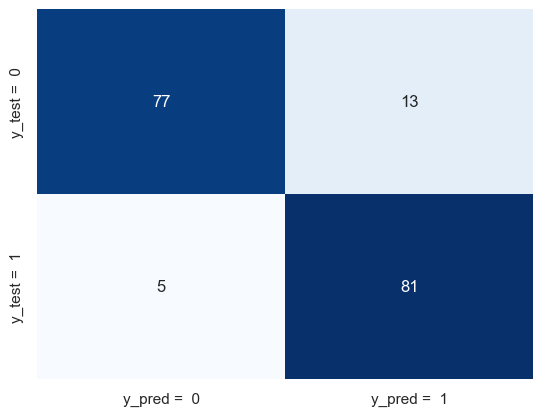

In [48]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='g', cbar=None, cmap="Blues", 
            xticklabels=['y_pred =  0', 'y_pred =  1'], yticklabels=['y_test =  0', 'y_test =  1']);

# Собираю стекинг, мета-модель - логистическая регрессия, по идее, это лучше, чем отдельно взятая одна из моделей

In [49]:
clf_v1 = grad
clf_v2 = ada_final
clf_v3 = rf_final

e_s_clf = StackingClassifier(
        estimators = [
            ('grad', clf_v1), 
            ('ada', clf_v2), 
            ('forest',clf_v3)],
        final_estimator = lr_final,
        stack_method = 'predict_proba'
)

e_s_clf.fit(X_train, y_train)

C:\Users\serdyukov\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\serdyukov\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\serdyukov\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\serdyukov\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\serdyukov\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in ve

StackingClassifier(estimators=[('grad',
                                Pipeline(steps=[('classifier',
                                                 GradientBoostingClassifier(learning_rate=0.11,
                                                                            min_samples_split=4,
                                                                            random_state=42,
                                                                            subsample=0.9))])),
                               ('ada',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                                                         random_state=42),
                                                   learning_rate=0.1,
                                                   n_estimators=200)),
                               ('forest',
                                Pipeline(steps=[('classifier',
                                                 RandomForestClassifier(max_depth=4,
                                                                        max_features=None,
                                                                        min_samples_leaf=2,
                                                                        n_estimators=1000,
                                                                        random_state=42))]))],
                   final_estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                                   ('lr',
                                                    LogisticRegression(C=1,
                                                                       penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear'))]),
                   stack_method='predict_proba')

In [50]:
y_pred_st= e_s_clf.predict(X_test)
print('f1:', f1_score(y_test,  y_pred_st))

f1: 0.8901734104046243


# Отличный результат

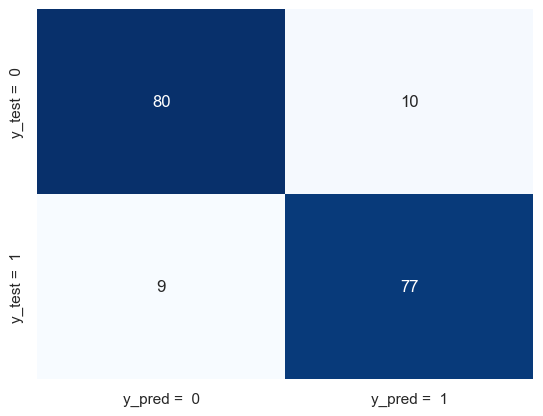

In [51]:
matrix = confusion_matrix(y_test, y_pred_st)
sns.heatmap(matrix, annot=True, fmt='g', cbar=None, cmap="Blues", 
            xticklabels=['y_pred =  0', 'y_pred =  1'], yticklabels=['y_test =  0', 'y_test =  1']);

# Разброс меньше 5% 

In [52]:
print('Правильность на обучающем наборе: {:.3f}'.format(e_s_clf.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(e_s_clf.score(X_test, y_test)))

Правильность на обучающем наборе: 0.927
Правильность на тестовом наборе: 0.892


# По итогу буду использовать стекинг с Ада бустингом, градиентным спуском и случайным лесом, мета-моделью выберу логистическую регрессию